<a href="https://colab.research.google.com/github/bonseong11/python/blob/main/29_1_%EC%8B%A0%EA%B2%BD%EB%A7%9D.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

두데이터를 내적과 행렬곱으로 표현 



In [ ]:
import numpy as np
w11 = np.array([-2, -2])
w12 = np.array([2,2])
w2 = np.array([1,1])
b1 = 3 # bias : 가중치가 0으로 가는 것을 방지 LAYER 마다 1개가 존재
b2 = -1
b3 = -1
def MLP(x, w, b): # MULTI LAYER Perceptron
  y = np.sum(w*x) + b
  if y <= 0:
    return 0
  else:
    return 1

def NAND(x1,x2):
  return MLP(np.array([x1, x2]), w11, b1)
def OR(x1, x2):
  return MLP(np.array([x1, x2]), w12, b2)
def AND(x1, x2): # 0 0, 0 1, 1 0 참 1, 1 
  return MLP(np.array([x1, x2]), w2, b3) # np.array([1, 1]), b3 = -1
def XOR(x1, x2):
  return AND(NAND(x1, x2), OR(x1,x2)) # 중간에 layer 가 필요

In [ ]:
print("OR문제")
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
  y = OR(x[0], x[1])
  print("입력 값: " + str(x) + "출력 값: " + str(y))
print('AND문제 ')
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
  y = AND(x[0], x[1])
  print("입력 값: " + str(x) + "출력 값: " + str(y))
print('NAND문제 ')
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
  y = NAND(x[0], x[1])
  print("입력 값: " + str(x) + "출력 값: " + str(y))
print('XOR문제 ')
for x in [(0, 0), (1, 0), (0, 1), (1, 1)]:
  y = XOR(x[0], x[1])
  print("입력 값: " + str(x) + "출력 값: " + str(y))

OR문제
입력 값: (0, 0)출력 값: 0
입력 값: (1, 0)출력 값: 1
입력 값: (0, 1)출력 값: 1
입력 값: (1, 1)출력 값: 1
AND문제 
입력 값: (0, 0)출력 값: 0
입력 값: (1, 0)출력 값: 0
입력 값: (0, 1)출력 값: 0
입력 값: (1, 1)출력 값: 1
NAND문제 
입력 값: (0, 0)출력 값: 1
입력 값: (1, 0)출력 값: 1
입력 값: (0, 1)출력 값: 1
입력 값: (1, 1)출력 값: 0
XOR문제 
입력 값: (0, 0)출력 값: 0
입력 값: (1, 0)출력 값: 1
입력 값: (0, 1)출력 값: 1
입력 값: (1, 1)출력 값: 0


In [ ]:
def plot_iris(X, y, model, title, xmin=-2.5, xmax=2.5, ymin=-2.5, ymax=2.5):
  XX, YY = np.meshgrid(np.arange(xmin, ymax, (xmax-xmin)/1000),
                       np.arange(ymin, ymax, (ymax-ymin)/1000))
  ZZ = np.reshape(model.predict(np.array([XX.ravel(), YY.ravel()]).T), XX.shape)
  plt.contourf(XX, YY, ZZ, alpha = 0.5)
  plt.scatter(X[y == 0, 0], X[y == 0, 1], c='r', marker='o', label='0', s=100)
  plt.scatter(X[y == 1, 0], X[y == 1, 1], c='g', marker='s', label='1', s=100)
  plt.xlim(xmin, xmax)
  plt.ylim(ymin, ymax)
  plt.title(title)
  plt.show()

In [ ]:
# Linear Regression 선형
# 회귀에서 비선형으로 데이터를 고차원 변환
# 신경망: 매 내적 계산시 activation function을 달아서 비선형으로 매핑
# sigmoid(0~1), tanh(-1~1), relu(0 이하는 0으로 하고, 양수는 그대로 수용)

(100, 2)
(100,)


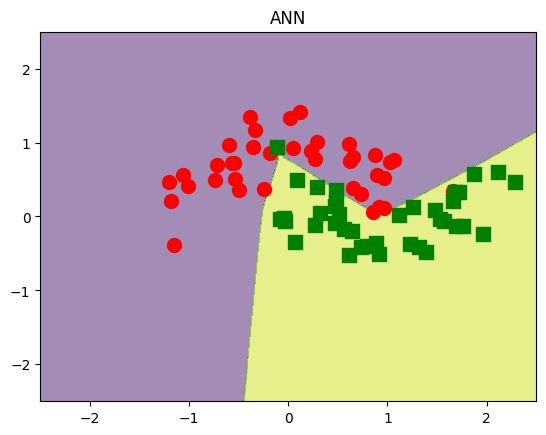

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


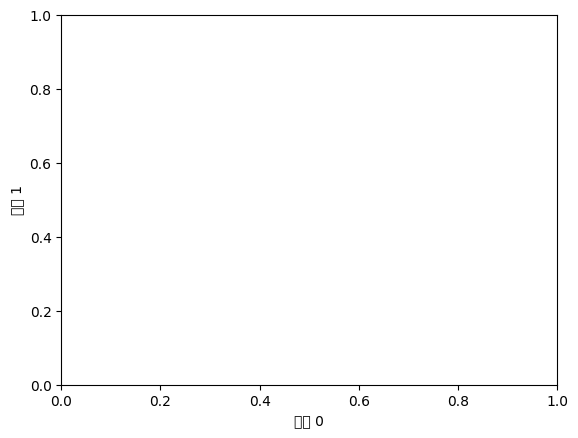

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neural_network import MLPClassifier
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
X, y = make_moons(n_samples=100, noise=0.25, random_state = 3)
print(X.shape) # 변수2 100x2
print(y.shape) # 100 분류문제
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y,
                                                    random_state = 42)
mlp = MLPClassifier(max_iter=3000, random_state = 0).fit(X_train, y_train)
# adam: learning-rate(학습률),momentum(zigzag이동을 방지: 가던방향을 고려해서) 지원
# 처음에는 크게, 오차가 작아지면 점점 작게 조절(작은 데이터로도 fitting이 가능)
# alpha L2 regularization 과적합을 방지
# batch_size 여러개의 sample의 결과값을 한꺼번에 조절: 지역해에 빠지는 것을 방지하기 위해
# 평균으로 한번 오차를 조절
# adaptive 적응적으로
# momentum, nesterovs_momentum(가던방향의 끝에서 주어진 방향으로)
# early_stopping 과적합 방지, 오차가 늘어나면 일정기간 참다가 종료 
plot_iris(X_train, y_train, mlp, 'ANN')
plt.xlabel('특성 0')
plt.ylabel('특성 1')

In [ ]:
mlp.coefs_ # 가중치

In [ ]:
mlp.get_params() # default parameter

{'activation': 'relu',
 'alpha': 0.0001,
 'batch_size': 'auto',
 'beta_1': 0.9,
 'beta_2': 0.999,
 'early_stopping': False,
 'epsilon': 1e-08,
 'hidden_layer_sizes': (100,),
 'learning_rate': 'constant',
 'learning_rate_init': 0.001,
 'max_fun': 15000,
 'max_iter': 3000,
 'momentum': 0.9,
 'n_iter_no_change': 10,
 'nesterovs_momentum': True,
 'power_t': 0.5,
 'random_state': 0,
 'shuffle': True,
 'solver': 'adam',
 'tol': 0.0001,
 'validation_fraction': 0.1,
 'verbose': False,
 'warm_start': False}

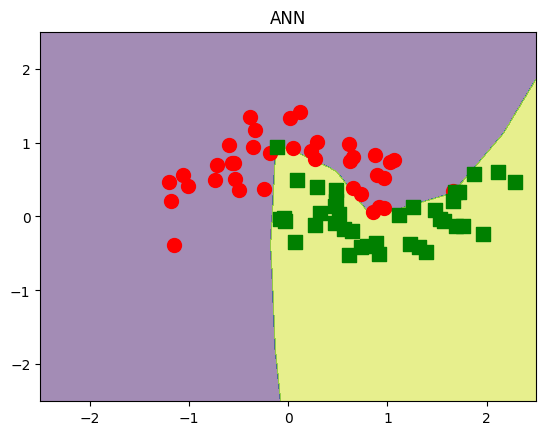

Text(0, 0.5, '특성 1')

/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 53945 (\N{HANGUL SYLLABLE TEUG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 49457 (\N{HANGUL SYLLABLE SEONG}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


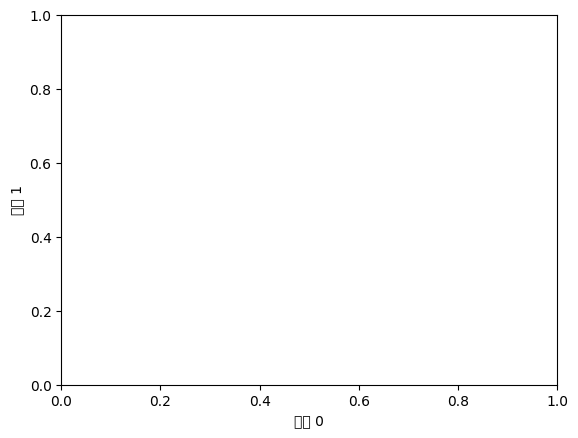

In [ ]:
mlp = MLPClassifier(solver='lbfgs', random_state=0, hidden_layer_sizes=[30, 10])
mlp.fit(X_train, y_train)
plot_iris(X_train, y_train, mlp, "ANN")
plt.xlabel("특성 0")
plt.ylabel("특성 1")
# 75x2 2x30 30x10 10x10

In [ ]:
X_train.shape

(75, 2)

In [ ]:
# ndarray를 list로 묶어 놓음
mlp.coefs_[0].shape # (2, 20)
#
# 75, 2 2, 20 => 75 x 20 (20, 20) => 75 20 20,1 => binary인 경우는 1개가 나
#

(2, 20)

In [ ]:
mlp.coefs_[1].shape

(20, 20)

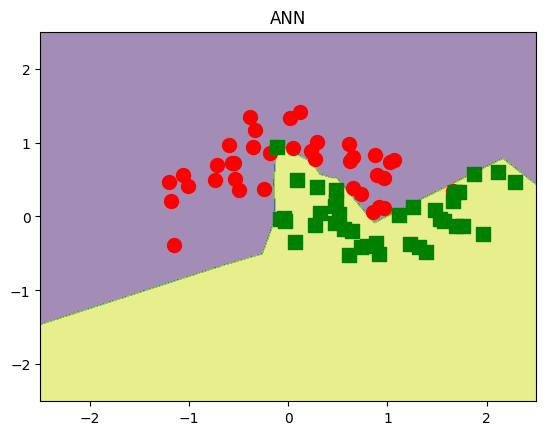

In [ ]:
mlp = MLPClassifier(solver='lbfgs', max_iter=500,
                    random_state=0, hidden_layer_sizes=[10, 10])
mlp.fit(X_train, y_train)
plot_iris(X_train, y_train, mlp, 'ANN')
# 가중치 사이즈를 계산하시요
# 75x 2 2x 10 10x10 10x1


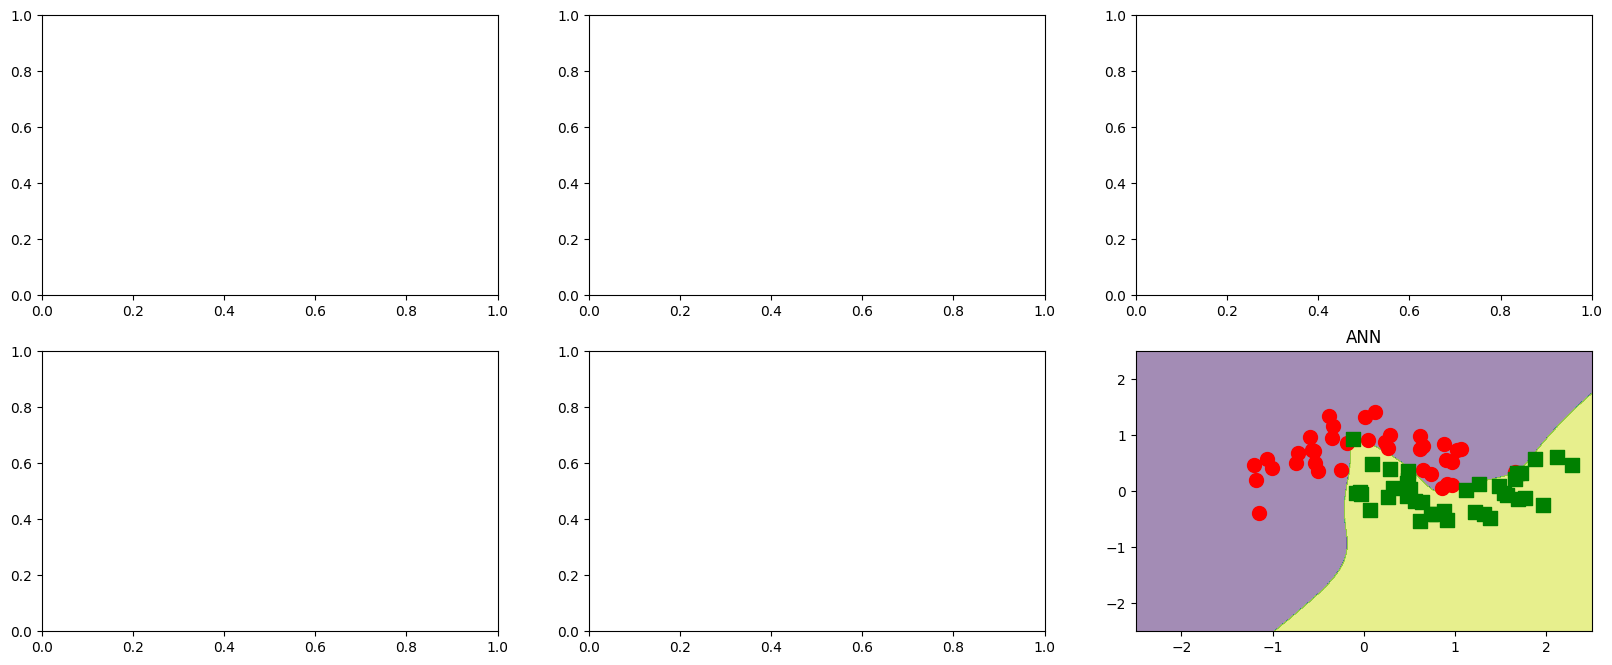

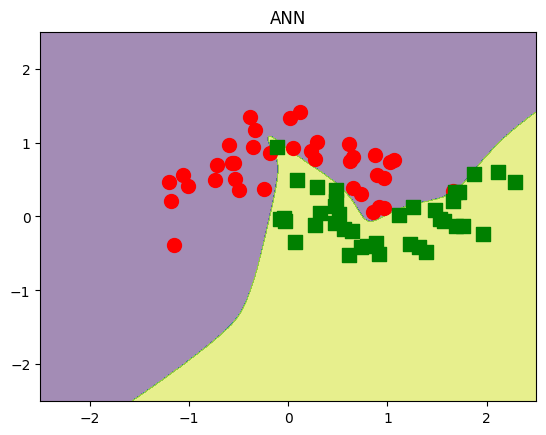

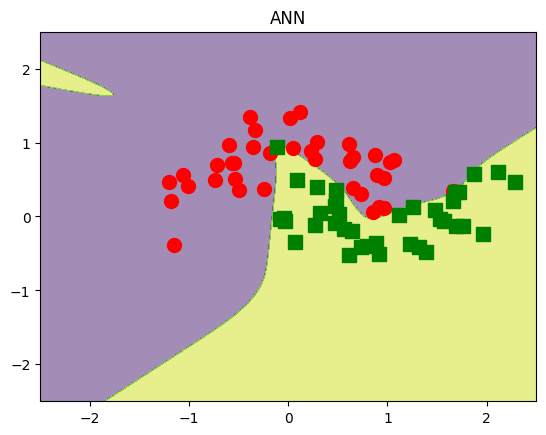

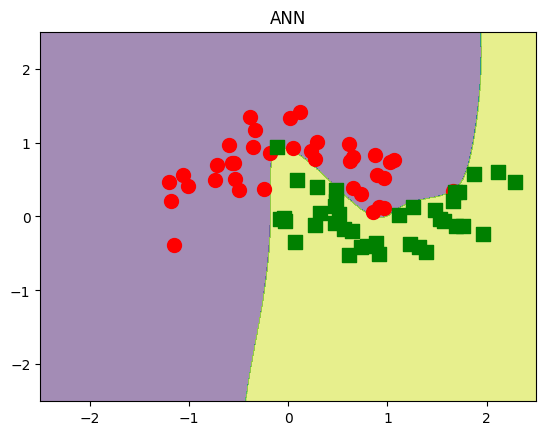

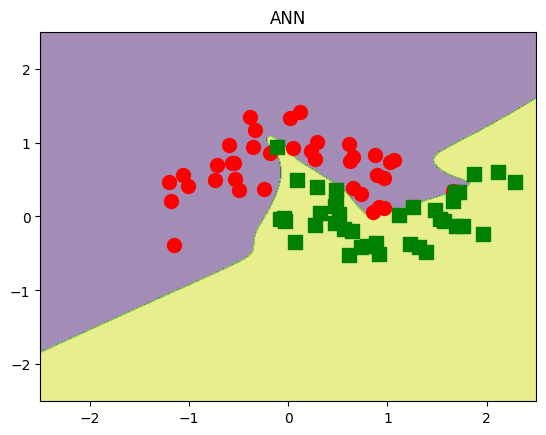

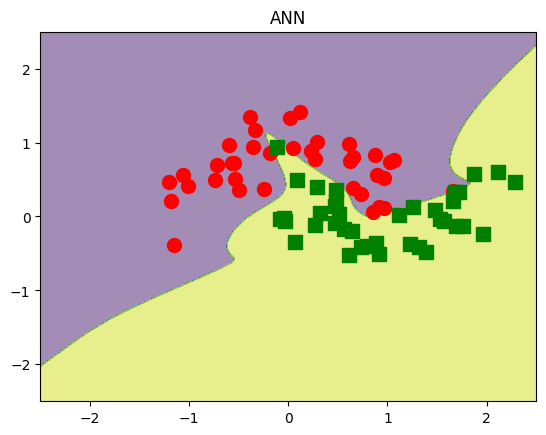

In [ ]:
fig, axes = plt.subplots(2, 3, figsize=(20, 8))
# 레이어의 사이즈를 변화시킬 때 큰 사이즈는 과적합을 불러온다.
# 75X2 2X10 10X10 10X1
# 75X2 2X100 100X100 100X1
# 특징을 잡아내는 회수가 늘어남 => 과적합
# 규제는 과적합방지 : 규제의 사이즈가 작아지면 규제를 줄이는 것
for axx, n_hidden_nodes in zip(axes, [10,100]):
  for ax, alpha in zip(axx, [0.1, 0.01, 0.001, 0.0001]): # 규제는 점점 작아짐 -> 과적
    mlp = MLPClassifier(solver='lbfgs', random_state=0, activation='tanh',
                        max_iter=1000, hidden_layer_sizes=[n_hidden_nodes, n_hidden_nodes],
                        alpha=alpha)
    mlp.fit(X_train, y_train)
    plot_iris(X_train, y_train, mlp, 'ANN')

In [ ]:
from sklearn.datasets import load_breast_cancer
import pandas as pd
cancer = load_breast_cancer()
cancer.feature_names #  암이 악성인지 양성

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [ ]:
pd.DataFrame(cancer.data).shape

(569, 30)

In [ ]:
# 정규화 여부와 신경망의 정확도 차이
X_train, X_test, y_train, y_test = train_test_split(
    cancer.data, cancer.target, random_state=0
)

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train, y_train)
print('훈련 세트 정확도: {:.2f}'.format(mlp.score(X_train, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test, y_test)))

훈련 세트 정확도: 0.94
테스트 세트 정확도: 0.92


In [ ]:
mlp = MLPClassifier(max_iter=1000, alpha=0.001, solver='sgd', activation='tanh',
                    random_state=0, hidden_layer_sizes=[15,5])
mlp.fit(X_train, y_train)
print("훈련세트 정확도 : {:.3f}".format(mlp.score(X_train, y_train)))
print("테스트세트 정확도 : {:.3f}".format(mlp.score(X_test, y_test)))

훈련세트 정확도 : 0.631
테스트세트 정확도 : 0.629


In [ ]:
# 정규화 여부와 신경망의 정확도 차이
# 신경망에서는 정규화하는 것이 유리하다.
mean_on_train = X_train.mean(axis=0)
std_on_train = X_train.std(axis=0)
X_train_scaled = (X_train - mean_on_train) / std_on_train
X_test_scaled = (X_test - mean_on_train) / std_on_train
mlp = MLPClassifier(max_iter=1000, alpha=0.001, solver='sgd', activation='tanh',
                    random_state=0, hidden_layer_sizes=[15,5])
mlp.fit(X_train_scaled, y_train)
print("훈련세트 정확도 : {:.3f}".format(mlp.score(X_train_scaled, y_train)))
print("테스트세트 정확도 : {:.3f}".format(mlp.score(X_test_scaled, y_test)))

훈련세트 정확도 : 0.986
테스트세트 정확도 : 0.958


In [ ]:

mlp = MLPClassifier(random_state=42)
mlp.fit(X_train_scaled, y_train)
print('훈련 세트 정확도: {:.2f}'.format(mlp.score(X_train_scaled, y_train)))
print("테스트 세트 정확도: {:.2f}".format(mlp.score(X_test_scaled, y_test)))

훈련 세트 정확도: 0.99
테스트 세트 정확도: 0.97


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
mlp.n_layers_

3

In [ ]:
mlp.coefs_[0].shape
# 입력데이터
# (569, 30) (30, 100) (100, 1)

(30, 100)

In [ ]:
mlp.coefs_[1].shape

(100, 1)

In [ ]:
# 정규화한 모델 [15.5]
# 569 30 (입력데이터) (30, 15) (15,5) (5,1) # intercept는 output 데이터에 붙음
mlp.coefs_[0].shape

(30, 15)

In [ ]:
mlp.coefs_[1].shape

(15, 5)

In [ ]:
mlp.coefs_[2].shape

(5, 1)

In [ ]:
mlp.classes_

array([0, 1])

In [ ]:
mlp.loss_

0.07859636214999614

In [ ]:
mlp.intercepts_

[array([-0.11144275,  0.33265416, -0.15599357, -0.29642056,  0.33167661,
        -0.19512157,  0.14532101, -0.28807372,  0.15601897,  0.2451209 ,
        -0.1911896 , -0.07076332, -0.06390728,  0.22743349, -0.19914024]),
 array([-0.49553958,  0.12941564,  0.13288166,  0.06505722,  0.44620796]),
 array([0.42739613])]

In [ ]:
mlp.intercepts_[0].shape

(15,)

In [ ]:
mlp.intercepts_[1].shape

(5,)

In [ ]:
mlp.intercepts_[2].shape

(1,)

In [ ]:
print(mlp.out_activation_) # logistic 2진분류
# activation function : sigmoid, tanh, relu # node에 붙어서 비선형으로 매핑
# identitiy(회귀일때), logistic(이항분류), softmax(다항분류)

logistic


/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51008 (\N{HANGUL SYLLABLE EUN}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45769 (\N{HANGUL SYLLABLE NIG}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 50976 (\N{HANGUL SYLLABLE YU}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 45787 (\N{HANGUL SYLLABLE NIS}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 51077 (\N{HANGUL SYLLABLE IB}) missing from current font.
  func(*args, **kwargs)
/usr/local/lib/python3.10/dist-packages/IPython/core/events.py:89: UserWarning: Glyph 47141 (\N{HANGUL SYLLABLE RYEOG}) missing from current font.
  func(*ar

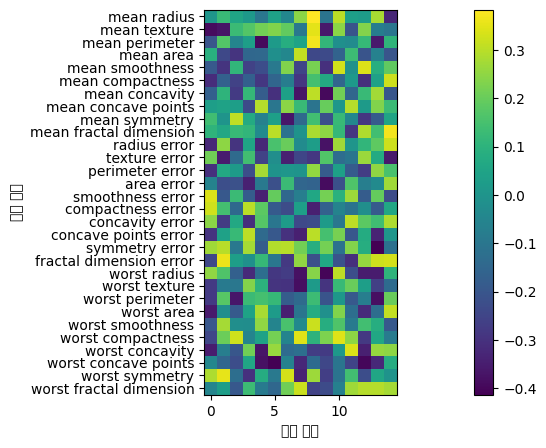

In [ ]:
# (30, 15) #각 변수에 대해서 15번의 걸쳐서 하나의 변수에 있어서 값을 
plt.figure(figsize=(20,5))
plt.imshow(mlp.coefs_[0], interpolation='none', cmap='viridis')
plt.yticks(range(30), cancer.feature_names)
plt.xlabel('은닉 유닛')
plt.ylabel('입력 특성')
plt.colorbar()

In [ ]:
import pandas as pd
wine = pd.read_csv('/content/drive/MyDrive/wine_data.csv', names = ["Cultivator", "Alchol", "Malic_Acid", "Ash",
                                             "Alcalinity_of_Ash", "Magnesium", "Total_phenols",
                                             "Falvanoids", "Nonflavanoid_phenols",
                                             "Proanthocyanins", "Color_intensity", "Hue",
                                             "OD280", "Proline"], encoding="utf-8")
print(wine.head())

   Cultivator  Alchol  Malic_Acid   Ash  Alcalinity_of_Ash  Magnesium  \
0           1   14.23        1.71  2.43               15.6        127   
1           1   13.20        1.78  2.14               11.2        100   
2           1   13.16        2.36  2.67               18.6        101   
3           1   14.37        1.95  2.50               16.8        113   
4           1   13.24        2.59  2.87               21.0        118   

   Total_phenols  Falvanoids  Nonflavanoid_phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color_intensity   Hue  OD280  Proline  
0             5.64  1.04   3.92     1065  
1             4.38  1.05   3.40     1050  
2    

In [ ]:
# 회귀(identitiy), 이진분류(logistic), 다중분류(softmax)
print(wine.shape)
wine['Cultivator'].unique() # 다중분류

(178, 14)


array([1, 2, 3])

In [ ]:
# X, y 데이터로 분리시키시요
X = wine.drop('Cultivator', axis=1)
y = wine['Cultivator']
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [ ]:
# 문제 : 독립변수에 정규화 작업을 진행하시요
# z점수 scaler = (data - mean) / sd
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # 평균, 표준편차를 구해줌 변수가 30개임 (각 특징에 대하여 자동으로 작업)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
mlp = MLPClassifier(hidden_layer_sizes=(30,30,30))
mlp.fit(X_train, y_train)

MLPClassifier(hidden_layer_sizes=(30, 30, 30))

In [ ]:
# 문제 테스트 데이터에 대하여 예측하고 accuracy_score를 출력하시요
from sklearn.metrics import accuracy_score
pred = mlp.predict(X_test)
accuracy_score(pred, y_test)

0.9555555555555556

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))

[[17  0  0]
 [ 0 16  1]
 [ 0  1 10]]
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        17
           2       0.94      0.94      0.94        17
           3       0.91      0.91      0.91        11

    accuracy                           0.96        45
   macro avg       0.95      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45



In [ ]:
mlp.out_activation_ # softmax (다중분류) : 결과값을 확률값1로 만들어주는 함수

'softmax'

In [ ]:
# 문제
# parameter tunning을 실시하시오 (GridSearchCV)
# hidden_layer_sizes : (30,30,30), (30,20,10)
# alpha : [0.0001, 0.001, 0.01, 0.1, 1]
from sklearn.model_selection import GridSearchCV

model = MLPClassifier(hidden_layer_sizes=(30,30,30), max_iter=1000)
model_cv = GridSearchCV(model, cv=5,
                        param_grid={
                                'hidden_layer_sizes' : [(30,30,30), (30,20,10)],
                                'alpha':[0.0001, 0.001, 0.01, 0.1, 1]
                        })
model_cv.fit(X_train,y_train)

print("best parameters:", model_cv.best_params_)
print("best score:", model_cv.best_score_)

best parameters: {'alpha': 0.01, 'hidden_layer_sizes': (30, 20, 10)}
best score: 0.9851851851851852


In [ ]:
model_cv.best_estimator_

MLPClassifier(hidden_layer_sizes=(30, 30, 30), max_iter=1000)

In [ ]:
model_cv.best_score_

0.9851851851851852

In [ ]:
model_cv.best_params_

{'alpha': 0.01, 'hidden_layer_sizes': (30, 20, 10)}

In [ ]:
predictions = model_cv.predict(X_test)
accuracy_score(predictions, y_test)

1.0

In [ ]:
import warnings
warnings.filterwarnings('ignore')
# 호출하면 코드 실행 중에 발생할 수 있는 모든 경고 메시지를 억제하도록 Python에 지시하는 것입니다. 
# 중요하지 않거나 현재 작업과 관련이 없는 경고를 숨기려는 경우에 유용할 수 있습니다.
import pandas as pd
data1=pd.read_csv('/content/drive/MyDrive/breast-cancer-wisconsin.csv', encoding='utf-8')
data1.head()
data1.columns # class : target

Index(['code', 'Clump_Thickness', 'Cell_Size', 'Cell_Shape',
       'Marginal_Adhesion', 'Single_Epithelial_Cell_Size', 'Bare_Nuclei',
       'Bland_Chromatin', 'Normal_Nucleoli', 'Mitoses', 'Class'],
      dtype='object')

In [ ]:
X = data1[data1.columns[1:10]]
y = data1[['Class']]

In [ ]:
X.dtypes
# 회귀, 분류 (신경망 model : XGBoost : 이게 결과가 좋음, SVM) #딥러닝 무
# Scaler
# 

Clump_Thickness                int64
Cell_Size                      int64
Cell_Shape                     int64
Marginal_Adhesion              int64
Single_Epithelial_Cell_Size    int64
Bare_Nuclei                    int64
Bland_Chromatin                int64
Normal_Nucleoli                int64
Mitoses                        int64
dtype: object

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, random_state=42)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier()
model.fit(X_scaled_train, y_train)
pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.9765625

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_train = confusion_matrix(y_train, pred_train)
print('훈련데이터 오차행렬 \n', confusion_train)

훈련데이터 오차행렬 
 [[328   5]
 [  7 172]]


In [ ]:
pred_test=model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.9590643274853801

In [ ]:
confusion_test = confusion_matrix(y_test, pred_test)
print("테스트데이터 오차행렬:\n", confusion_test)

테스트데이터 오차행렬:
 [[106   5]
 [  2  58]]


In [ ]:
param_grid={'hidden_layer_sizes': [10, 30, 50, 100], 'solver': ['sgd','adam'],
            'activation': ['tanh', 'relu']}
from sklearn.model_selection import GridSearchCV
grid_search=GridSearchCV(MLPClassifier(), param_grid, cv=5)
grid_search.fit(X_scaled_train, y_train)

GridSearchCV(cv=5, estimator=MLPClassifier(),
             param_grid={'activation': ['tanh', 'relu'],
                         'hidden_layer_sizes': [10, 30, 50, 100],
                         'solver': ['sgd', 'adam']})

In [ ]:
print('TestSet Score: {:.4f}'.format(grid_search.score(X_scaled_test, y_test)))

TestSet Score: 0.9591


In [ ]:
# 회귀문제 MLPRegressor
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
# 기억해두기

In [ ]:
data2 = pd.read_csv('/content/drive/MyDrive/house_price.csv', encoding='utf-8')
X = data2[data2.columns[1:5]]
y = data2[['house_value']] # 결측치, 정규화 => 범주화 ( 어렵게 )

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
scaler = MinMaxScaler()
scaler.fit(X_train)
X_scaled_train = scaler.transform(X_train)
X_scaled_test = scaler.transform(X_test)

In [ ]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
model.fit(X_scaled_train, y_train)
pred_train = model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

-2.936023076131413

In [ ]:
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

-2.8927097486249926

In [ ]:
import numpy as np
from sklearn.metrics import mean_squared_error
MSE_train = mean_squared_error(y_train, pred_train)
MSE_test = mean_squared_error(y_test, pred_test)
print('훈련 데이터 RMSE:', np.sqrt(MSE_train)) # 188111.15087679442
print("테스트 데이터 RMSE", np.sqrt(MSE_test)) # 187373.9748254538

훈련 데이터 RMSE: 189356.34489681615
테스트 데이터 RMSE 188620.32345000815


In [ ]:
#  문제 : 모델 튜닝을 통해서 rmse를 줄여보세요

In [ ]:
from sklearn.neural_network import MLPRegressor
model=MLPRegressor(hidden_layer_sizes=(64,64,64), activation='relu',
                   random_state=1, max_iter=2000)
model.fit(X_scaled_train, y_train)
pred_train=model.predict(X_scaled_train)
model.score(X_scaled_train, y_train)

0.566197903746314

In [ ]:
pred_test = model.predict(X_scaled_test)
model.score(X_scaled_test, y_test)

0.5840866843135079

In [ ]:
# 데이터 전송
# 문제 
# 데이터를 로딩하시요
# CRIM 필드를 기준으로 내림차순으로 정렬하시요
# 정렬된 데이터의 9번째 행을 출력하시요
# 9번재 행의 데이터로 9번째까지 데이터를 모두 변경하시오
# AGE가 80 이상인 건물의 RIM 평균을 구하시요
import pandas as pd
data3 = pd.read_csv('/content/drive/MyDrive/201_boston.csv', encoding='utf-8')
data3.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [ ]:
# CRIM 필드를 기준으로 내림차순으로 정렬하시오
boston_sort = data3.sort_values(by='CRIM', ascending=False)
print(boston_sort.head())

        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
380  28.6558  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
418  28.6558  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
405  28.6558  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
410  28.6558  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
414  28.6558  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   

     PTRATIO       B  LSTAT  
380     20.2  210.97  20.08  
418     20.2  210.97  20.08  
405     20.2  210.97  20.08  
410     20.2  210.97  20.08  
414     20.2  210.97  20.08  


In [ ]:
# 정렬된 데이터의 9번째 행을 출력하시오
crim10_value = boston_sort.iloc[9,0]
print(crim10_value)

25.9406


In [ ]:
# 9번째 행의 데이터를 9번째 까지 데이터를 모두 변경하시오
boston_sort.iloc[:9, 0] = crim10_value
print(boston_sort.head(12))

        CRIM   ZN  INDUS  CHAS    NOX     RM    AGE     DIS   RAD    TAX  \
380  25.9406  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
418  25.9406  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
405  25.9406  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
410  25.9406  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
414  25.9406  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
404  25.9406  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
398  25.9406  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
427  25.9406  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
413  25.9406  0.0   18.1   0.0  0.597  5.155  100.0  1.5894  24.0  666.0   
417  25.9406  0.0   18.1   0.0  0.679  5.304   89.1  1.6475  24.0  666.0   
400  25.0461  0.0   18.1   0.0  0.693  5.987  100.0  1.5888  24.0  666.0   
403  24.8017  0.0   18.1   0.0  0.693  5.349   96.0  1.7028  24.0  666.0   

     PTRATI

In [ ]:
# AGE가 80이상인 건물의 RIM 평균을 구하시오
boston_sort_80 = boston_sort[boston_sort ['AGE']>=80]
result = boston_sort_80['CRIM'].mean()
print(result)

5.843126099585063


In [ ]:
# 데이터 로딩
# 데이터의 total_bedrooms 필드의 80%만 별도 취함
# 표준편차 계산
# 중위수를 계산
# 결측값을 중위로 채움
# 채운후에 표준편차를 구함
# 처음 표준편차를 구함값과 나중에 결측치를 채운후의 표준편차의 값의 차를 구함
import warnings
warnings.filterwarnings('ignore')
import pandas as pd
housing = pd.read_csv('/content/drive/MyDrive/202_housing.csv', encoding='utf-8')
housing.head()
housing.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [ ]:
# 데이터의 total_bedrooms 필드의 80%만 별도 취함
int(housing.shape[0] * 0.8)
int(len(housing)*0.8)
bedrooms = housing['total_bedrooms'][:int(len(housing)*0.8)]
print(bedrooms)

0         129.0
1        1106.0
2         190.0
3         235.0
4         280.0
          ...  
16507     599.0
16508     331.0
16509     411.0
16510     941.0
16511     417.0
Name: total_bedrooms, Length: 16512, dtype: float64


In [ ]:
# 표준편차 계산
std1 = bedrooms.std()
print(std1)
med = bedrooms.median()
print(med)

435.90057705252616
436.0


In [ ]:
# 결측값을 중위로 채움
# 채운후에 표준편차를 구함
bedrooms_fill = bedrooms.fillna(med)
std2 = bedrooms_fill.std()
print(std2)

433.9254297608805


In [ ]:
# 처음 표준편차를 구함값과 나중에 결측치를 채운후의 표준편차의 값의 차를 구함
result = abs(std1 - std2)
print(result)

1.9751472916456692


In [ ]:
# 데이터를 로딩하고
# housing['population']에 대하여 평균과 표준편차를 구하시요
population = housing['population']
mean = population.mean()
std = population.std()
print("평균", mean)
print("표준편차", std)
# 이상치의 임계치를 계산하시요
# 이상값 데이터를 추출하시요
# 이상값 데이터의 합계를 구하시요


평균 1425.4767441860465
표준편차 1132.462121765341


In [ ]:
# 이상치의 임계치를 계산하시요
lower = mean - (std * 1.5)
upper = mean + (std * 1.5)

print("정상범위 최소값 : ", lower)
print("정상범위 최대값 : ", upper)

정상범위 최소값 :  -273.2164384619648
정상범위 최대값 :  3124.169926834058


In [ ]:
population_outlier = population[(population < lower) | (population > upper)]
print(population_outlier)

95       3469.0
185      4367.0
283      4985.0
460      3337.0
485      3276.0
          ...  
20543    3717.0
20544    6330.0
20563    6837.0
20604    3265.0
20629    6912.0
Name: population, Length: 1207, dtype: float64


In [ ]:
result = population_outlier.sum()
print(result)

5607295.0


In [ ]:
# 신경망의 softmax
# 신경망 
# 회귀 : identity
# 이진분류 : logistic
# 다중분류 : softmax


In [ ]:
import numpy as np
scores = [3.0, 1.0, 0.2]
def softmax(x):
    return np.exp(x) / np.sum(np.exp(x), axis = 0) # axis 행방향

In [ ]:
print(softmax(scores))

[0.8360188  0.11314284 0.05083836]


In [ ]:
sum(softmax(scores))

0.9999999999999999

-1.0
-1.0


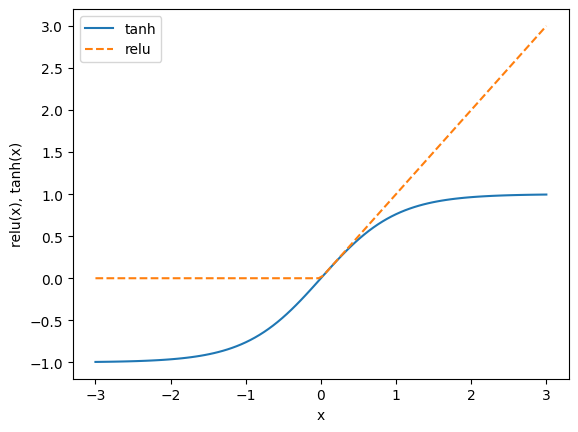

In [ ]:
# np.maximum(line, 0) : relu함수
# activation function : 비선형 매핑
# 내적하는 연산 node 마다 activation function을 작동

line = np.linspace(-3, 3, 100)
plt.plot(line, np.tanh(line), label='tanh')
# fitting 속도가 빨라짐
plt.plot(line, np.maximum(line, 0), linestyle='--', label='relu')
plt.legend(loc='best')
plt.xlabel('x')
plt.ylabel('relu(x), tanh(x)')
print(np.tanh(-100)) # -1 ~ 1 : sigmoid 확률값으로 매핑 0~ 1값
print(np.tanh(-1000000))

In [ ]:
def sigmoid(inputs):
  sigmoid_scores = [1 / float(1+np.exp(-x)) for x in inputs]
  return sigmoid_scores
sigmoid_inputs = [-200, 3, 5, 6, 10, 100]
sigmoid(sigmoid_inputs)


[1.3838965267367376e-87,
 0.9525741268224334,
 0.9933071490757153,
 0.9975273768433653,
 0.9999546021312976,
 1.0]

In [ ]:
# bostondata를 로딩한 다음
# 데이터 분포를 시각화하시요
# 각 열의 데이터에 대하여 평균과 표준편차를 구하시요
# 7:3으로 데이터를 분할한다음 신경망을 이용하여 예측 모델을 구성하시요
# 평가
# parameter tunging으로 rmse의 값인 오차를 줄요보세요

import pandas as pd
import numpy as np

data_url = 'http://lib.stat.cmu.edu/datasets/boston'
title = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'RAD', 'TAX', 'PTRATIO',
         'B', 'LSTAT', 'medv']
raw_df = pd.read_csv(data_url, sep='\s+', skiprows=22, header=None)
data = np.hstack([raw_df.values[::2,:], raw_df.values[1::2, :2]])
target = raw_df.values[1::2,2]
print(type(data))
boston_df = pd.DataFrame(data, columns=title)
boston_df.head()
X=boston_df.iloc[:, :12] #독립변수
print(X.shape)
y = boston_df.iloc[:, 12] # 종속변수
y.shape

<class 'numpy.ndarray'>
(506, 12)


(506,)

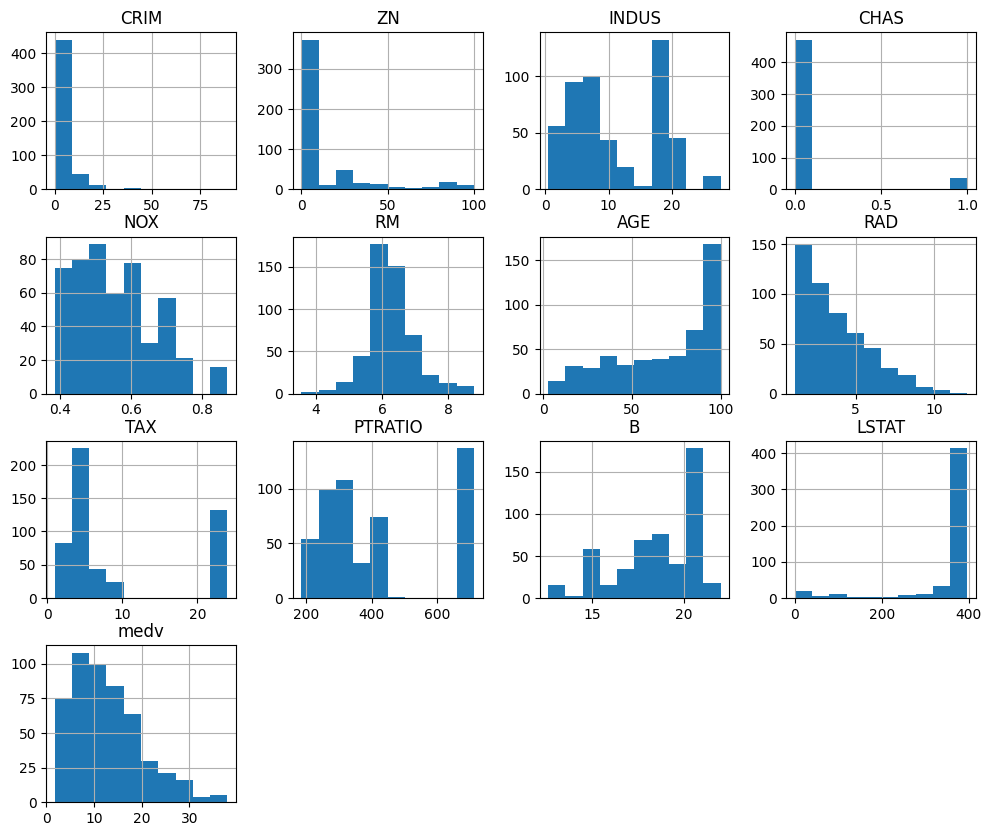

In [ ]:
# 데이터 분포를 시각화하시요
import matplotlib.pyplot as plt
boston_df.hist(figsize=(12, 10))
plt.show()

In [ ]:
# 각 열의 데이터에 대하여 평균과 표준편차를 구하시요
mean_values = np.mean(X, axis=0)
std_values = np.std(X, axis=0)
print(mean_values)
print(std_values)

CRIM         3.613524
ZN          11.363636
INDUS       11.136779
CHAS         0.069170
NOX          0.554695
RM           6.284634
AGE         68.574901
RAD          3.795043
TAX          9.549407
PTRATIO    408.237154
B           18.455534
LSTAT      356.674032
dtype: float64
CRIM         8.593041
ZN          23.299396
INDUS        6.853571
CHAS         0.253743
NOX          0.115763
RM           0.701923
AGE         28.121033
RAD          2.103628
TAX          8.698651
PTRATIO    168.370495
B            2.162805
LSTAT       91.204607
dtype: float64


In [ ]:
# 7:3으로 데이터를 분할한다음 신경망을 이용하여 예측 모델을 구성하시요
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train) # 평균, 표준편차를 구해줌 변수가 30개임 (각 특징에 대하여 자동으로 작업)
X_scaler_train = scaler.transform(X_train)
X_scaler_test = scaler.transform(X_test)



In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.neural_network import MLPRegressor
model = MLPRegressor()
param_grid = {
            'hidden_layer_sizes' : [(30,30,30), (30,20,10)],
            'alpha':[0.0001, 0.001, 0.01, 0.1, 1]
}
model_cv = GridSearchCV(model, param_grid=param_grid, cv=5)
model_cv.fit(X_scaler_train, y_train)

print("Best parameters:", model_cv.best_params_)
print("best score:", model_cv.best_score_)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptro

Best parameters: {'alpha': 0.0001, 'hidden_layer_sizes': (30, 30, 30)}
best score: 0.6404847043488278


/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
best_model = model_cv.best_estimator_
best_model.fit(X_scaler_train, y_train)
predictions_train = best_model.predict(X_scaler_train)
predictions_test = best_model.predict(X_scaler_test)

/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


In [ ]:
from sklearn.metrics import mean_squared_error
rmse_train = np.sqrt(mean_squared_error(y_train, predictions_train))
rmse_test = np.sqrt(mean_squared_error(y_test, predictions_test))
print("RMSE_train:", rmse_train)
print("RMSE_test:", rmse_test)

RMSE_train: 3.285407832326586
RMSE_test: 4.091182667386591


NameError: ignored